Q1

Let A(n*k) and B(k*m) be the two matrices which we are going to multiply and C be the answer matrix. To get C[i, j], we will first multiply elements in ith row of matrix A with elements in jth column of matrix B and then add them all. These are k multiplications per element in C as all the rows in matrix A and all the columns in matrix B have k elements. And k-1 additions to add all those k numbers. Like this for every elementin C i.e. n*m times. So k*m*n multiplications and (k-1)*m*n additions.

In [31]:
# Q2

import timeit
import numpy as np

a = np.random.rand(100, 90)
b = np.random.rand(90, 120)

def matmul(a, b):
    c = [[0 for _ in range(len(b[0]))] for _ in range(len(a))]
    for i in range(len(c)):
        for j in range(len(c[i])):
            for k in range(len(a[0])):
                c[i][j] += a[i][k] * b[k][j]
    return c

start = timeit.default_timer()
answer = matmul(a, b)
end = timeit.default_timer()

print(f"Time required to multiply by using list in list {end-start}")

import numpy as np

start1 = timeit.default_timer()
ans = np.dot(a, b)
end1 = timeit.default_timer()

print(f"Time required to multiply by using numpy {end1-start1}")

Time required to multiply by using list in list 0.447858199942857
Time required to multiply by using numpy 0.00027030007913708687


Matrix multiplication is faster by numpy than list in list method. Numpy array is densely packed in memory due to its homogeneous type, it also frees the memory faster.

In [40]:
# Q3

a = np.random.randint(100, size=(30))

def median_scratch(a):
    for i in range(0, len(a)):
        for j in range(0, len(a) - i - 1):
            if a[j] > a[j + 1]:
                a[j + 1], a[j] = a[j], a[j + 1]
    n = len(a)
    n1 = a[n//2]
    n2 = 0
    if n % 2 == 0:
        n2 = a[n//2 + 1]
    return (n1 + n2) / 2

print(median_scratch(a))

61.0


Time complexity of this code is O(n^2). We can sort the array with better sorting algorithm and find the middle element.

Q4

Gradient of the function = (x^2)*y + (y^3)*sin(x) with respect to x and y is as follows:
<2*x*y + (y^3)*cos(x), (x^2) + 3*(y^2)*sin(x)>

In [11]:
# Q5

import jax
import jax.numpy as np

def f(x, y):
    return (x**2) * y + (y**3) * np.sin(x)

def grad_analytical(x, y):
    df_dx = 2 * x * y + (y**3) * np.cos(x)
    df_dy = (x**2) + 3 * (y**2) * np.sin(x)
    return df_dx, df_dy

grad_jax = jax.grad(f, argnums=(0, 1))

rng = jax.random.PRNGKey(0)
x_values = jax.random.uniform(rng, shape=(3,))
y_values = jax.random.uniform(rng, shape=(3,))

for x, y in zip(x_values, y_values):
    analytical_grad = grad_analytical(x, y)
    jax_grad = grad_jax(x, y)
    print(f"Analytical Gradient: {analytical_grad}")
    print(f"JAX Gradient: {jax_grad}")
    print("\n")

Analytical Gradient: (Array(2.375661, dtype=float32), Array(3.2304244, dtype=float32))
JAX Gradient: (Array(2.375661, dtype=float32), Array(3.2304244, dtype=float32))


Analytical Gradient: (Array(0.22768012, dtype=float32), Array(0.19097292, dtype=float32))
JAX Gradient: (Array(0.22768012, dtype=float32), Array(0.19097292, dtype=float32))


Analytical Gradient: (Array(1.005974, dtype=float32), Array(1.1119254, dtype=float32))
JAX Gradient: (Array(1.005974, dtype=float32), Array(1.1119254, dtype=float32))




In [36]:
# Q6

import sympy as sy

df_dx_sy = sy.diff(f, x)
df_dy_sy = sy.diff(f, y)

for x_val, y_val in zip(x_values, y_values):
    analytical_grad_result = grad_analytical(x_val, y_val)
    sympy_grad_result = (df_dx_sy.subs({x: x_val, y: y_val}), df_dy_sy.subs({x: x_val, y: y_val}))
    print(f"Analytical Gradient: {analytical_grad_result}")
    print(f"Sympy Gradient: {sympy_grad_result}")
    print("\n")

Analytical Gradient: (0.02105857065158281, 0.40620758637466725)
SymPy Gradient: (0.0210585706515828, 0.406207586374667)


Analytical Gradient: (0.9572656606868477, 0.6016322872582919)
SymPy Gradient: (0.957265660686848, 0.601632287258292)


Analytical Gradient: (0.8345968228340145, 0.1040581018864543)
SymPy Gradient: (0.834596822834014, 0.104058101886454)




In [39]:
# Q7

student_records = {
    2022: {
        'Branch 1': {
            'Roll Number': 1, 'Name': 'N', 'Marks': {
                'Maths': 100, 'English': 70
            }
        },
        'Branch 2': {}
    },
    2023: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2024: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2025: {
        'Branch 1': {},
        'Branch 2': {}
    }
}

In [13]:
# Q8

class STUDENT:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class BRANCH:
    def __init__(self, name, students=None):
        self.name = name
        self.students = students or []

class YEAR:
    def __init__(self, year, branches=None):
        self.year = year
        self.branches = branches or []

student1 = STUDENT(1, 'N', {'Maths': 100, 'English': 70})
branch1 = BRANCH('Branch 1', students=[student1])
year2022 = YEAR(2022, branches=[branch1])
database = [year2022]

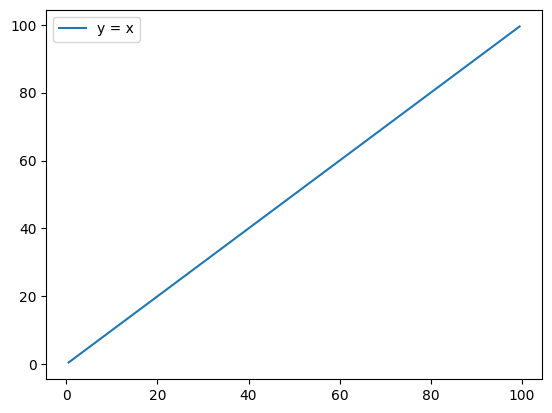

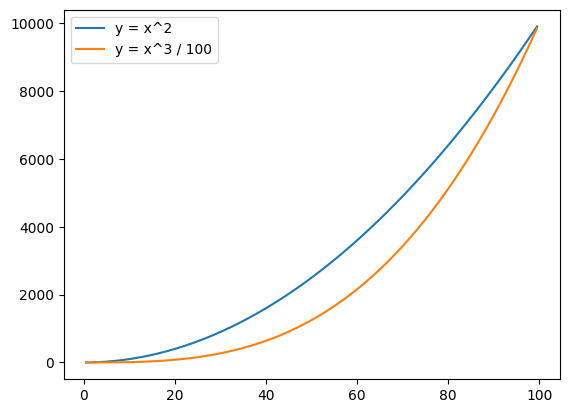

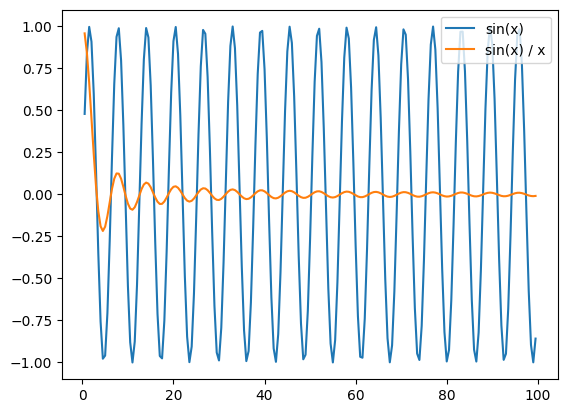

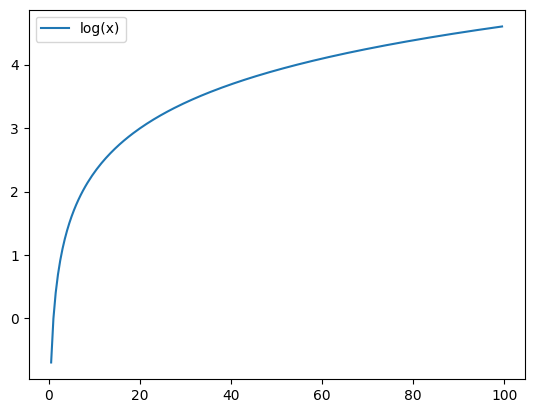

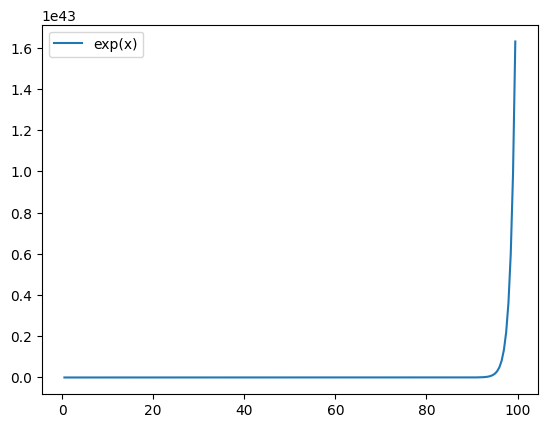

In [57]:
# Q9

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.0, 0.5)
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)
plt.plot(x, y1, label = 'y = x')
plt.legend()
plt.show()
plt.plot(x, y2, label = 'y = x^2')
plt.plot(x, y3, label = 'y = x^3 / 100')
plt.legend()
plt.show()
plt.plot(x, y4, label = 'sin(x)')
plt.plot(x, y5, label = 'sin(x) / x')
plt.legend()
plt.show()
plt.plot(x, y6, label = 'log(x)')
plt.legend()
plt.show()
plt.plot(x, y7, label = 'exp(x)')
plt.legend()
plt.show()

In [14]:
# Q10

import numpy as np
import pandas as pd

# matrix
matrix = np.random.uniform(1, 2, (20, 5))
# dataframe
df = pd.DataFrame(matrix)
#giving column names
df.columns = ['a', 'b', 'c', 'd', 'e']

# column name of the column with highest standard deviation
print(f"column with highest standard deviation is {df.std().idxmax()}")

# row with minimum mean
print(f"row with lowest mean is {df.mean(axis = 1).idxmin()}")


column with highest standard deviation is c
row with lowest mean is 19


In [15]:
# Q11

# creating new column with sum of all the columns 
df['f'] = df[list(df.columns)].sum(axis = 1)

# “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

print(f"number of rows in the dataframe where the value in the column “g” is “LT8” is {(df['g'] == 'LT8').sum()}")

print(f"the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively is as follows: {df.groupby(['g']).std()['f']}")

number of rows in the dataframe where the value in the column “g” is “LT8” is 14
the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively is as follows: g
GT8    0.118798
LT8    0.551418
Name: f, dtype: float64


In [2]:
# Q12

import numpy as np

a = np.array([[0, 0], [1, 1]])
b = np.array([2])

print(a+b)

[[2 2]
 [3 3]]


In [26]:
# Q13

import numpy as np

def sub_argmin(arr):
    min = arr[0]
    lst = 0
    for i in range(len(arr)):
        if arr[i] < min:
            lst = i
            min = arr[i]
    return lst

def alt_argmin(a):
    llst = []
    if isinstance(a[0], np.ndarray):
        for i in a:
            llst.append(sub_argmin(i))
        return llst
    return sub_argmin(a)

aray = np.array([4, 2, 3, 2, 5, 3, 2, 1, 5, 6, 1, 7, 2, 4, 2, 1, 5, 1])

print(alt_argmin(aray))
print(np.argmin(aray))


7
7
